### Working with NumPy
All data structures in Open3D are natively compatible with a NumPy buffer. The following tutorial generates a variant of sync function using NumPy and visualizes the function using Open3D.

First, we generates a $n \times 3$ matrix ***xyz***. Each column has $x$, $y$, and $z$ values of the function $z = \frac{\sin{x^2 + y^2}}{x^2 + y^2}$.  $\ z_{norm}$ is the normalized map of $z$ for the \[0, 1\] range.

In [1]:
import open3d as o3d 
import numpy as np 
import matplotlib.pyplot as plt 
import copy
import Open3D.examples.python.open3d_tutorial as o3dtut
import time

[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\normal_map.npy already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\raycast_vtx_004.npy already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\tests\cube.obj already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\vertex_map.npy already exists, skipped.


In [2]:
# Generate some neat n times 3 matrix using a variant of sync function
x = np.linspace(-3, 3, 401)
mesh_x, mesh_y = np.meshgrid(x, x)
z = np.sinc((np.power(mesh_x, 2) +np.power(mesh_y, 2)))
z_norm = (z - z.min())/(z.max() - z.min())
xyz = np.zeros((np.size(mesh_x), 3))
xyz[:, 0] = np.reshape(mesh_x, -1)
xyz[:, 1] = np.reshape(mesh_y, -1)
xyz[:, 2] = np.reshape(z_norm, -1)
print('size: ', np.size(mesh_x), ' shape: ', mesh_x.shape)
print('xyz')
print(xyz)

size:  160801  shape:  (401, 401)
xyz
[[-3.         -3.          0.17846472]
 [-2.985      -3.          0.17440115]
 [-2.97       -3.          0.17063709]
 ...
 [ 2.97        3.          0.17063709]
 [ 2.985       3.          0.17440115]
 [ 3.          3.          0.17846472]]


#### From NumPy to open3d.PointCloud
Open3D provides conversion from a NumPy matrix to a vector of 3D vectors. By using ***Vector3dVector***, a NumPy matrix can be directly assigned to ***open3d.PointCloud.points***.

In this manner, any similar data structure such as ***open3d.PointCloud.colors*** or ***open3d.PointCloud.normals*** can be assigned or modified using NumPy. The code below also saves the point cloud as a ***ply*** file for the next step.

In [3]:
# Pass xyz to Open3D.o3d.geometry.PointCloud and visualize
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)
o3d.io.write_point_cloud("sync.ply", pcd)

True

#### From open3d.PointCloud to NumPy
As shown in this example, ***pcd_load.points*** of type ***Vector3dVector*** is converted into a NumPy array using ***np.asarray***.

xyz_load
[[-3.         -3.          0.17846472]
 [-2.985      -3.          0.17440115]
 [-2.97       -3.          0.17063709]
 ...
 [ 2.97        3.          0.17063709]
 [ 2.985       3.          0.17440115]
 [ 3.          3.          0.17846472]]


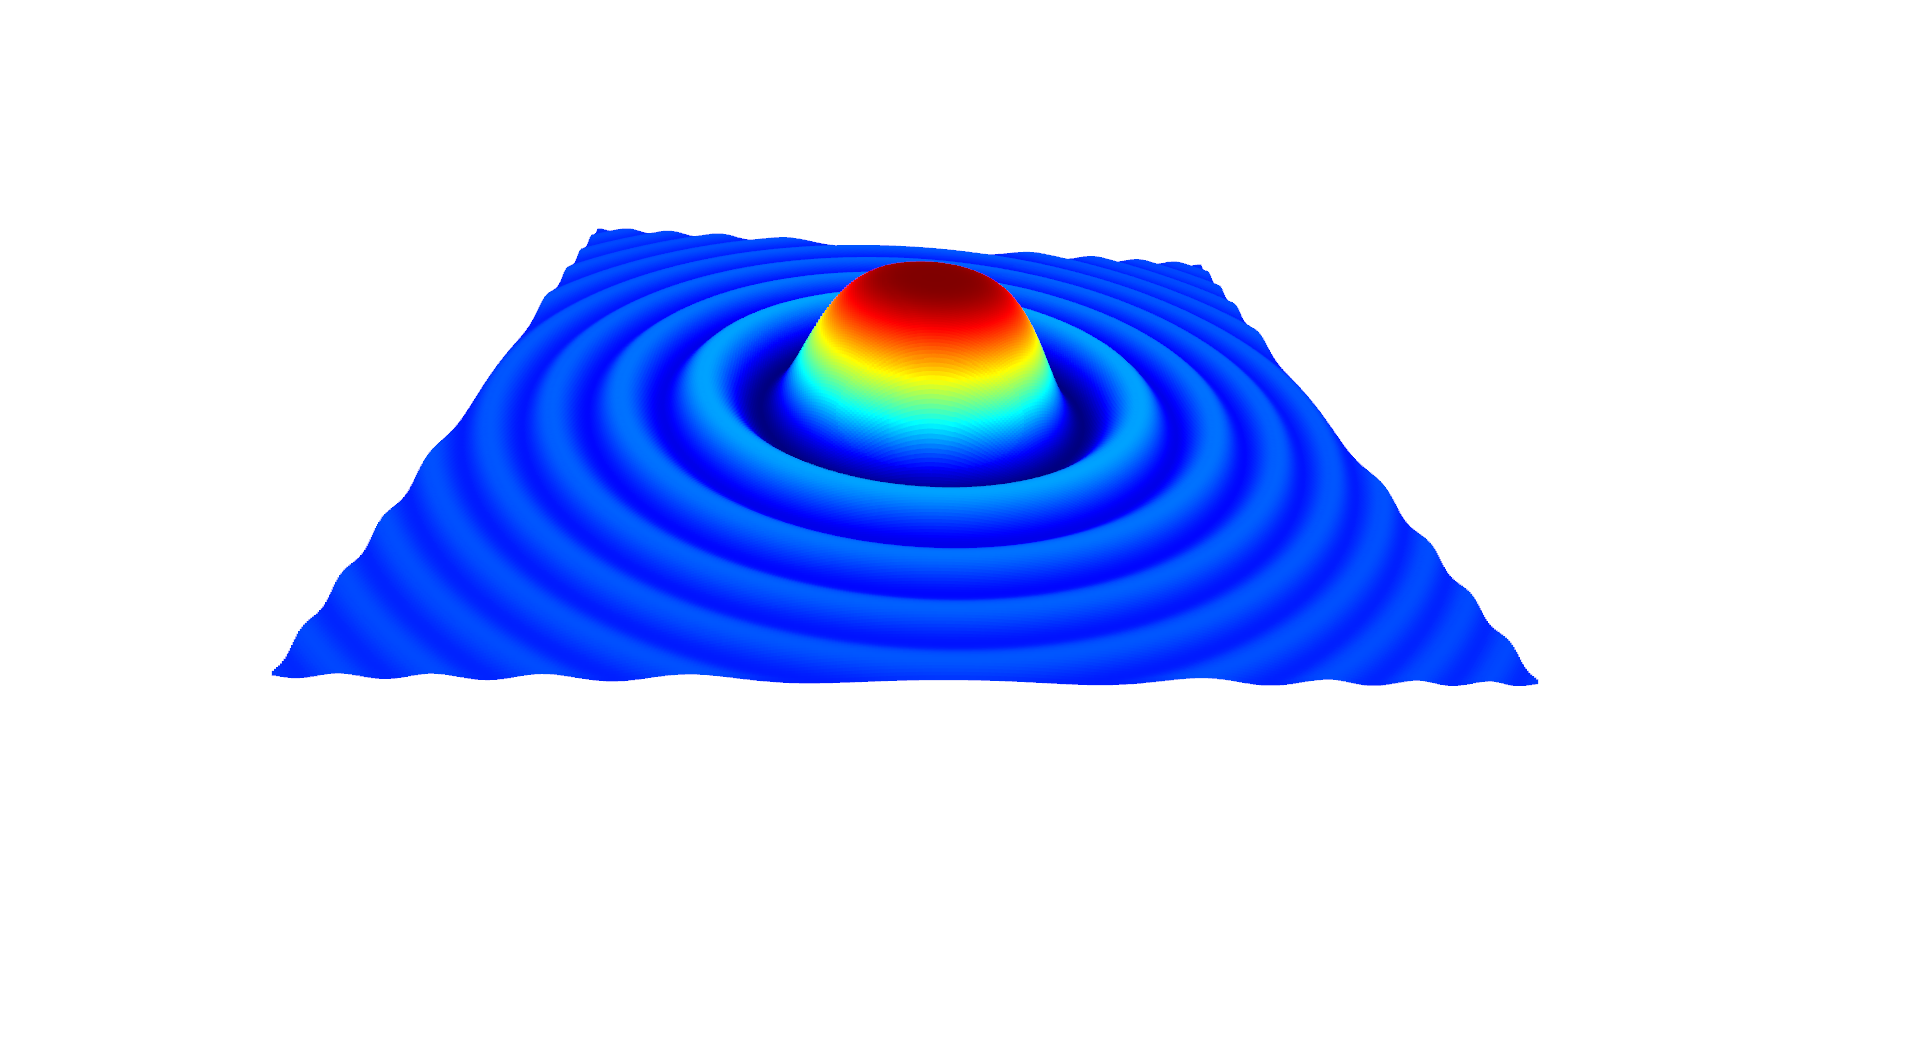

In [4]:
# Load saved point cloud and visualize it
pcd_load = o3d.io.read_point_cloud("sync.ply")

# Convert Open3D.o3d.geometry.PointCloud to numpy array
xyz_load = np.asarray(pcd_load.points)
print('xyz_load')
print(xyz_load)
o3d.visualization.draw_geometries([pcd_load])